**Neural Networks- Fall 2023**

**Cracow University of Technology**

**Laboratory No. 3:**

**1) Neural network for classification task using SGD, BGD, and MiniGD algorithms**


**2) Forward and backward pass for a two-layer neural network using the backpropagation algorithm**



Task 1

Write the code for a one-layer neural network on the first 100 samples of IRIS dataset using SGD, BGD, and MiniGD and compare the results.

Activation function: Sigmoid

In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x = iris.data[0:100, [2, 3]]  # petal length and petal width
y = iris.target[0:100]

sc = StandardScaler()
sc.fit(x)  # to estimate mean and standard deviation
xstd = sc.transform(x)
x = xstd

class NeuralNetwork:
    def __init__(self, input_size):
        self.input_size = input_size
        self.weights = np.random.randn(input_size + 1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        self.pred = self.sigmoid(z)
        return self.pred

    def stochastic_gradient_descent(self, x, y, learning_rate, epochs):
        for epoch in range(epochs):
            for i in range(len(x)):
                prediction = self.forward(x[i])
                error = y[i] - prediction
                self.weights[1:] += learning_rate * error * x[i]
                self.weights[0] += learning_rate * error

    def batch_gradient_descent(self, x, y, learning_rate, epochs):
        for epoch in range(epochs):
            prediction = self.forward(x)
            errors = y - prediction
            self.weights[1:] += learning_rate * np.dot(errors, x)
            self.weights[0] += learning_rate * sum(errors)

    def minibatch_gradient_descent(self, x, y, learning_rate, epochs, batch_size=3):
        N = x.shape[0]
        num_batches = N // batch_size

        for epoch in range(epochs):
            indices = np.random.permutation(N)
            x_shuffled = x[indices]
            y_shuffled = y[indices]

            for i in range(0, N, batch_size):
                x_batch = x_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                prediction = self.forward(x_batch)
                errors = y_batch - prediction

                self.weights[1:] += learning_rate * np.dot(errors, x_batch)
                self.weights[0] += learning_rate * sum(errors)

    def predict(self, X):
        predictions = []
        for x in X:
            output = self.forward(x)
            predictions.append(output)
        return predictions

# Hyperparameters
input_size = x.shape[1]
learning_rate = 0.01
epochs = 1000

# Create and train the neural network
model = NeuralNetwork(input_size)
model.minibatch_gradient_descent(x, y, learning_rate, epochs, batch_size=3)

# Make predictions on the entire dataset
y_pred = np.round(model.predict(x))

# Calculate the percentage of misclassifications
error_rate = np.mean(y_pred != y) * 100
print('Error = %2.2f %%' % error_rate)


Error = 0.00 %


Task 2:

Write the forward pass of a two-layer neural network using the following randomly generated dataset belogning to two different classes according to XOR function. Activation is Sigmoid function for both layers and the loss is categorical cross-entropy. There are two neurons in the hidden layer.

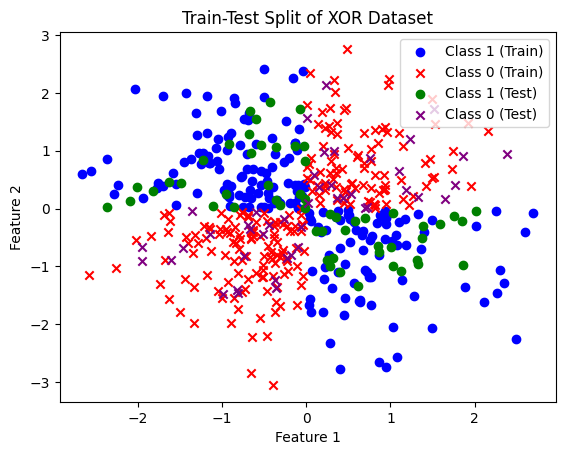

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate XOR dataset
np.random.seed(0)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, 0)

# Convert binary labels to one-hot encoding
y_one_hot = np.column_stack([(1 - y), y])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Define the architecture of the neural network
input_size = X_train.shape[1]
hidden_size = 2
output_size = 2  # Two classes for one-hot encoding

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
biases_output = np.zeros((1, output_size))

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define categorical cross-entropy loss
def categorical_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred), axis=-1)
    return np.mean(loss)

# Forward pass
def forward_pass(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    # Input to hidden layer
    hidden_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)

    # Hidden to output layer
    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    output = sigmoid(output_input)

    return output

# Perform forward pass on training set
output_train = forward_pass(X_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

# Calculate categorical cross-entropy loss on training set
loss_train = categorical_cross_entropy(y_train, output_train)

# Perform forward pass on testing set
output_test = forward_pass(X_test, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

# Calculate categorical cross-entropy loss on testing set
loss_test = categorical_cross_entropy(y_test, output_test)

# Plot the training set
plt.scatter(X_train[y_train[:, 1] == 1, 0], X_train[y_train[:, 1] == 1, 1], c='blue', marker='o', label='Class 1 (Train)')
plt.scatter(X_train[y_train[:, 0] == 1, 0], X_train[y_train[:, 0] == 1, 1], c='red', marker='x', label='Class 0 (Train)')

# Plot the testing set
plt.scatter(X_test[y_test[:, 1] == 1, 0], X_test[y_test[:, 1] == 1, 1], c='green', marker='o', label='Class 1 (Test)')
plt.scatter(X_test[y_test[:, 0] == 1, 0], X_test[y_test[:, 0] == 1, 1], c='purple', marker='x', label='Class 0 (Test)')

plt.title('Train-Test Split of XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()


Task 3:
: Write calculations of a two-layer neural network's forward and backward passes for the following example. Activations are sigmoid function and loss is squared error function.
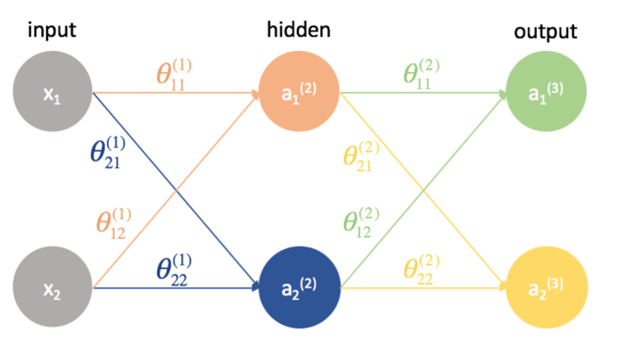

Input values are: $0.05$ and $0.10$, and output are $0.01$ and $0.99$.

Initial weights are: $θ_{11}^{(1)}=0.15$, $θ_{12}^{(1)}=0.25$, $θ_{21}^{(1)}=0.2$, $θ_{22}^{(1)}=0.3$, $θ_{11}^{(2)}=0.4$, $θ_{12}^{(2)}=0.5$, $ θ_{21}^{(2)}=0.45$, $θ_{22}^{(2)}=0.45$

Biases are: $b_1=0.35$, $b_2=0.6$
